In [1]:
import luminol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%config IPCompleter.greedy=True

Using TensorFlow backend.


In [2]:
#Loading NDVI dataset
df_2018 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\dataset_LaPeyrouse_2018.csv",delimiter=';')
df_2017 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\dataset_LaPeyrouse_2017.csv",delimiter=';')
df_2016 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\dataset_LaPeyrouse_2016.csv",delimiter=';')

In [3]:
#Adding month coloumn to the dataset
df_2018['Date'] = pd.to_datetime(df_2018['Date'])
df_2018['Month'] = df_2018['Date'].apply(lambda x: x.month)

df_2017['Date'] = pd.to_datetime(df_2017['Date'])
df_2017['Month'] = df_2017['Date'].apply(lambda x: x.month)

df_2016['Date'] = pd.to_datetime(df_2016['Date'])
df_2016['Month'] = df_2016['Date'].apply(lambda x: x.month)

#Creating new dataframe with 'NDVI_mean','Month' as coloumns
df_2016_new = df_2016[['NDVI_mean','Month']]
df_2016_new = df_2016_new.groupby('Month').agg({ 'NDVI_mean':'mean'}).reset_index()

df_2017_new = df_2017[['NDVI_mean','Month']]
df_2017_new = df_2017_new.groupby('Month').agg({ 'NDVI_mean':'mean'}).reset_index()

df_2018_new = df_2018[['NDVI_mean','Month']]
df_2018_new = df_2018_new.groupby('Month').agg({ 'NDVI_mean':'mean'}).reset_index()

In [4]:
#This is a manual process to insert missing NDVI values(NDVI values for some months might be missing)
m1 = df_2017_new[df_2017_new['Month']==2].NDVI_mean.values[0]
m2 = df_2018_new[df_2018_new['Month']==2].NDVI_mean.values[0]
df_2016_new = df_2016_new.append({'Month' : 2 , 'NDVI_mean' : (m1+m2)/2} , ignore_index=True)

m1 = df_2017_new[df_2017_new['Month']==3].NDVI_mean.values[0]
m2 = df_2018_new[df_2018_new['Month']==3].NDVI_mean.values[0]
df_2016_new = df_2016_new.append({'Month' : 3 , 'NDVI_mean' : (m1+m2)/2} , ignore_index=True)

df_2016_new = df_2016_new.sort_values(by=['Month'])

In [5]:
#Concatenation of dataframe of 2016, 2017 and 2018
DF1 =  pd.concat([df_2016,df_2017])
DF2 =  pd.concat([DF1,df_2018])

DF = DF2[['Date','NDVI_mean']]
DF = DF.append({'Date' : '2016-02-22', 'NDVI_mean' : 0.191004} , ignore_index=True)
DF = DF.append({'Date' : '2016-03-22', 'NDVI_mean' : 0.215451} , ignore_index=True)
DF['Date'] = pd.to_datetime(DF['Date'])
DF = DF.sort_values(by=['Date'])
DF = DF.groupby('Date')['NDVI_mean'].sum().reset_index()

In [6]:
DF = DF.set_index('Date')
DF.index

DatetimeIndex(['2016-01-29', '2016-02-22', '2016-03-22', '2016-04-08',
               '2016-04-18', '2016-05-18', '2016-06-07', '2016-06-27',
               '2016-07-07', '2016-07-17', '2016-08-06', '2016-08-16',
               '2016-08-26', '2016-09-05', '2016-10-15', '2016-11-24',
               '2016-12-14', '2016-12-24', '2017-01-03', '2017-02-22',
               '2017-03-14', '2017-04-03', '2017-04-13', '2017-04-23',
               '2017-05-23', '2017-06-12', '2017-07-02', '2017-07-07',
               '2017-07-12', '2017-07-17', '2017-07-27', '2017-08-06',
               '2017-08-21', '2017-09-05', '2017-09-10', '2017-09-20',
               '2017-10-05', '2017-10-10', '2017-10-25', '2017-11-14',
               '2017-11-19', '2017-12-19', '2017-12-24', '2018-01-18',
               '2018-01-28', '2018-02-07', '2018-02-12', '2018-02-27',
               '2018-03-14', '2018-04-18', '2018-05-23', '2018-06-22',
               '2018-07-07', '2018-07-12', '2018-07-17', '2018-07-27',
      

In [7]:
y = DF['NDVI_mean'].resample('MS').mean()

In [8]:
#Loading weather dataset
df_weather_2018 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\weather_2018.csv")
df_weather_2017 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\weather_2017.csv")
df_weather_2016 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\weather_2016.csv")

In [9]:
#Concatenation of dataframe of 2016, 2017 and 2018
DF1 =  pd.concat([df_weather_2016,df_weather_2017])
DF2 =  pd.concat([DF1,df_weather_2018])

DF_weather = DF2[['precip_avg','temperature_avg','humidity_avg']]

In [10]:
#Comibining NDVI and weather dataframes
#Now coloumns are : NDVI_mean,precip_avg,temperature_avg,humidity_avg
DF_weather.index = y.index
Y = pd.concat([y,DF_weather],axis=1)

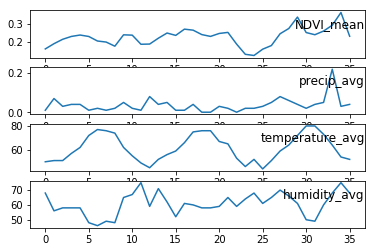

In [11]:
#Plotting all the coloumns of dataframe which contains 3 years data(36 months)
#X-axis is number of months
values = Y.values

# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Y.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Converting time-series into supervised data

In [12]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



data = series_to_supervised(values)
print(data)

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)  var2(t)  var3(t)  \
1    0.161925       0.01       50.0       68.0  0.191004     0.07     51.0   
2    0.191004       0.07       51.0       56.0  0.215451     0.03     51.0   
3    0.215451       0.03       51.0       58.0  0.231281     0.04     57.0   
4    0.231281       0.04       57.0       58.0  0.239082     0.04     62.0   
5    0.239082       0.04       62.0       58.0  0.231071     0.01     72.0   
6    0.231071       0.01       72.0       48.0  0.205880     0.02     77.0   
7    0.205880       0.02       77.0       46.0  0.200058     0.01     76.0   
8    0.200058       0.01       76.0       49.0  0.177095     0.02     74.0   
9    0.177095       0.02       74.0       48.0  0.240259     0.05     62.0   
10   0.240259       0.05       62.0       65.0  0.238435     0.02     55.0   
11   0.238435       0.02       55.0       67.0  0.187823     0.01     49.0   
12   0.187823       0.01       49.0       75.0  0.188958     0.0

In [13]:
#Dropping the coloumns which are not required for prediction
data.drop(data.columns[[5,6,7]], axis=1, inplace=True)

In [14]:
train_X = data.values[:,:-1]
train_Y = data.values[:,-1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

In [15]:
# designing the network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fitting the model
history = model.fit(train_X, train_Y, epochs=20, batch_size=5, verbose=2, shuffle=False)

Epoch 1/20
 - 1s - loss: 0.5647
Epoch 2/20
 - 0s - loss: 0.1848
Epoch 3/20
 - 0s - loss: 0.1224
Epoch 4/20
 - 0s - loss: 0.0782
Epoch 5/20
 - 0s - loss: 0.0600
Epoch 6/20
 - 0s - loss: 0.0472
Epoch 7/20
 - 0s - loss: 0.0470
Epoch 8/20
 - 0s - loss: 0.0333
Epoch 9/20
 - 0s - loss: 0.0375
Epoch 10/20
 - 0s - loss: 0.0328
Epoch 11/20
 - 0s - loss: 0.0371
Epoch 12/20
 - 0s - loss: 0.0299
Epoch 13/20
 - 0s - loss: 0.0351
Epoch 14/20
 - 0s - loss: 0.0307
Epoch 15/20
 - 0s - loss: 0.0309
Epoch 16/20
 - 0s - loss: 0.0298
Epoch 17/20
 - 0s - loss: 0.0330
Epoch 18/20
 - 0s - loss: 0.0304
Epoch 19/20
 - 0s - loss: 0.0313
Epoch 20/20
 - 0s - loss: 0.0293


In [16]:
# Using the december-2018 values to predict january-2019 NDVI value.
X_test = Y.values[-1:,:]
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

In [17]:
# Actual-Observed values in January-2019
x_jan_2019 = [0.20934236,0.01,46,58]

In [18]:
y_test = model.predict(X_test)
print(y_test)

[[0.22546148]]


In [20]:
'''We have forecasted value and actual value. Based on a certain threshold, we can compare these values and found out 
   whether forecasted value is anomaly or not.
'''
print("Forecasted value: "+str(x_jan_2019[0]))
print("Actual value: "+str(y_test[0][0]))

Forecasted value: 0.20934236
Actual value: 0.22546148
